<a href="https://colab.research.google.com/github/AjaharDaroga/Bike_Shearing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# important libraries
import pandas as pd
import numpy as np
import seaborn as sns              #visualization library
import matplotlib.pyplot as plt   #visualization library
from sklearn.model_selection import train_test_split # Divide the data into train and test set
from sklearn.model_selection import GridSearchCV     
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the dataset
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE_PROJECTS/SUPERVISED_ML_REGRESSION_BIKE_SHARING/SeoulBikeData.csv',encoding = "ISO-8859-1")

In [ ]:
# view the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# shape of dataset (i.e row & col)
df.shape

(8760, 14)

In [ ]:
# Features 
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# missing data
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# discriptive analysis for numerical feartures
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


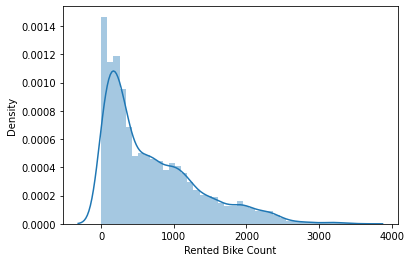

In [ ]:
#Distribution Plot of Target variable
sns.distplot(df['Rented Bike Count'])

positively skewed data need to transform.

## Relationship with numerical variables

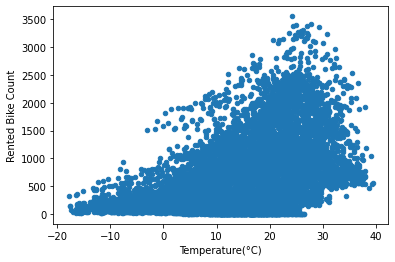

In [ ]:
#scatter plot Temperature(°C)/Rented Bike Count
data = pd.concat([df['Rented Bike Count'], df['Temperature(°C)']], axis=1)
data.plot.scatter(x='Temperature(°C)', y='Rented Bike Count')

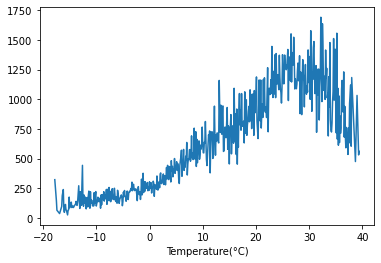

In [ ]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

Higher the temp requirement of bikes rented at each hour in also high

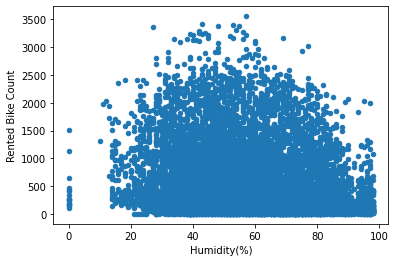

In [ ]:
#scatter plot Humidity/Rented Bike Count
data = pd.concat([df['Rented Bike Count'], df['Humidity(%)']], axis=1)
data.plot.scatter(x='Humidity(%)', y='Rented Bike Count')

Humidity range between 20 to 80% then count of bikes rented is high.

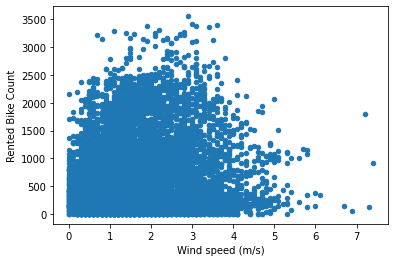

In [ ]:
#scatter plot Winf Speed/Rented Bike Count
data = pd.concat([df['Rented Bike Count'], df['Wind speed (m/s)']], axis=1)
data.plot.scatter(x='Wind speed (m/s)', y='Rented Bike Count')

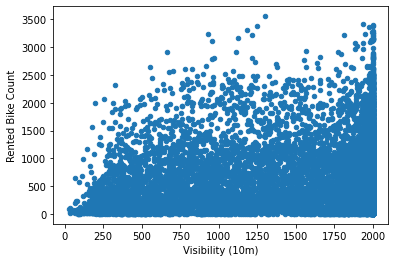

In [ ]:
#scatter plot Temperature(°C)/Rented Bike Count
data = pd.concat([df['Rented Bike Count'], df['Visibility (10m)']], axis=1)
data.plot.scatter(x='Visibility (10m)', y='Rented Bike Count')

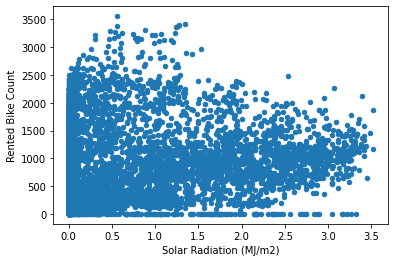

In [ ]:
#scatter plot Solar Radiation/Rented Bike Count
data = pd.concat([df['Rented Bike Count'], df['Solar Radiation (MJ/m2)']], axis=1)
data.plot.scatter(x='Solar Radiation (MJ/m2)', y='Rented Bike Count')

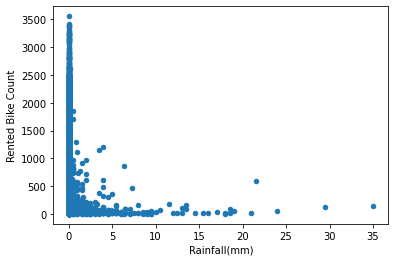

In [ ]:
#scatter plot Temperature(°C)/Rented Bike Count
data = pd.concat([df['Rented Bike Count'], df['Rainfall(mm)']], axis=1)
data.plot.scatter(x='Rainfall(mm)', y='Rented Bike Count')

we can conclude that if no rainfall then number of bike count is more.

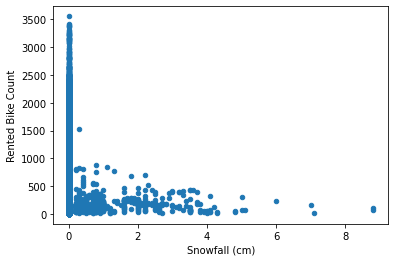

In [ ]:
#scatter plot Temperature(°C)/Rented Bike Count
data = pd.concat([df['Rented Bike Count'], df['Snowfall (cm)']], axis=1)
data.plot.scatter(x='Snowfall (cm)', y='Rented Bike Count')

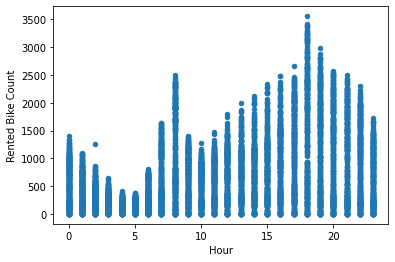

In [ ]:
#scatter plot Temperature(°C)/Rented Bike Count
data = pd.concat([df['Rented Bike Count'], df['Hour']], axis=1)
data.plot.scatter(x='Hour', y='Rented Bike Count')

High demand on 8 am in morning and 3 to 8 pm 

## Relationship with categorical features

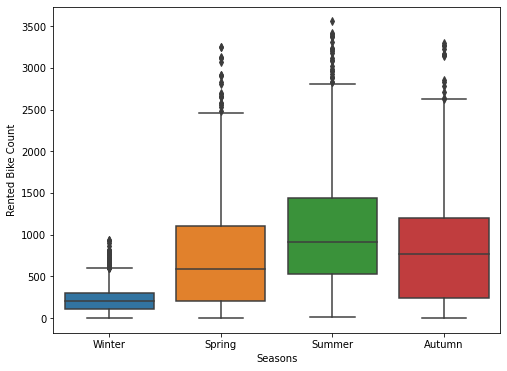

In [ ]:
#box plot overallqual/saleprice
data = pd.concat([df['Rented Bike Count'], df['Seasons']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Seasons', y="Rented Bike Count", data=df)

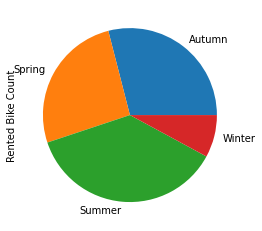

In [ ]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

Less demand on winter seasons and High demand on Summer seasons

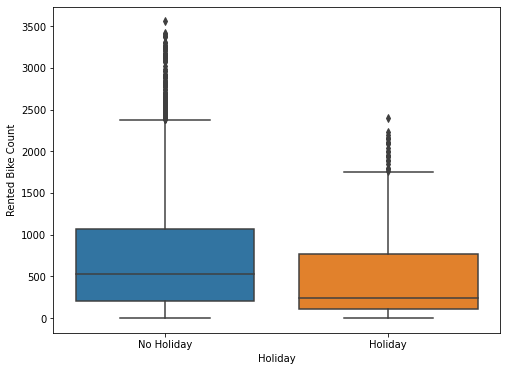

In [ ]:
#box plot overallqual/saleprice
data = pd.concat([df['Rented Bike Count'], df['Holiday']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Holiday', y="Rented Bike Count", data=df)

high demand on No Holidays compare to Holidays

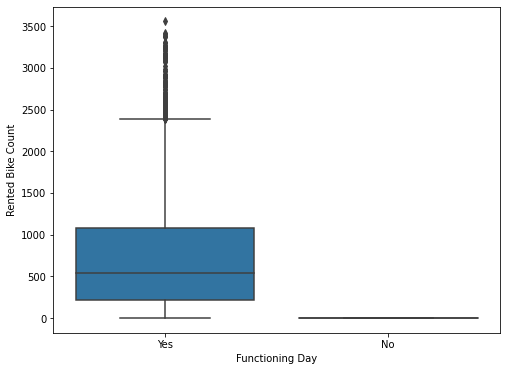

In [ ]:
#box plot overallqual/saleprice
data = pd.concat([df['Rented Bike Count'], df['Functioning Day']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Functioning Day', y="Rented Bike Count", data=df)

On non functioning day there is no demand.

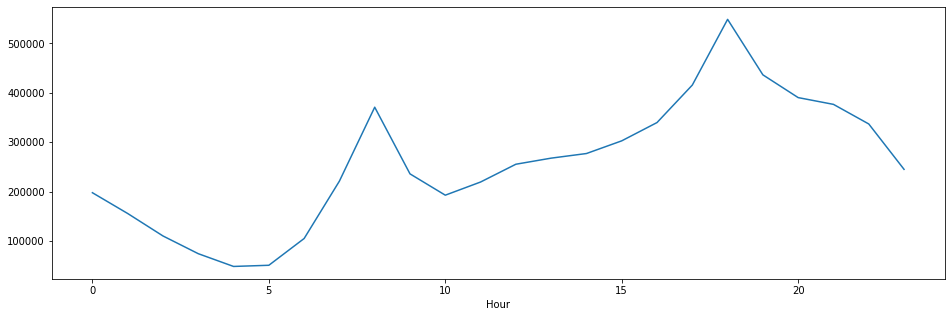

In [ ]:
#ploting line graph group by Hrs and get average Bikes rented
plt.figure(figsize=(16,5))
df.groupby('Hour').sum()['Rented Bike Count'].plot()

In [ ]:
#We convert as datetime the series 'Date'
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")
df['WeekDay']=df["Date"].dt.day_name() 
df['Month']=df['Date'].dt.month

In [ ]:
high_No_Count=pd.DataFrame(df.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
high_No_Count

,Rented Bike Count
WeekDay,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


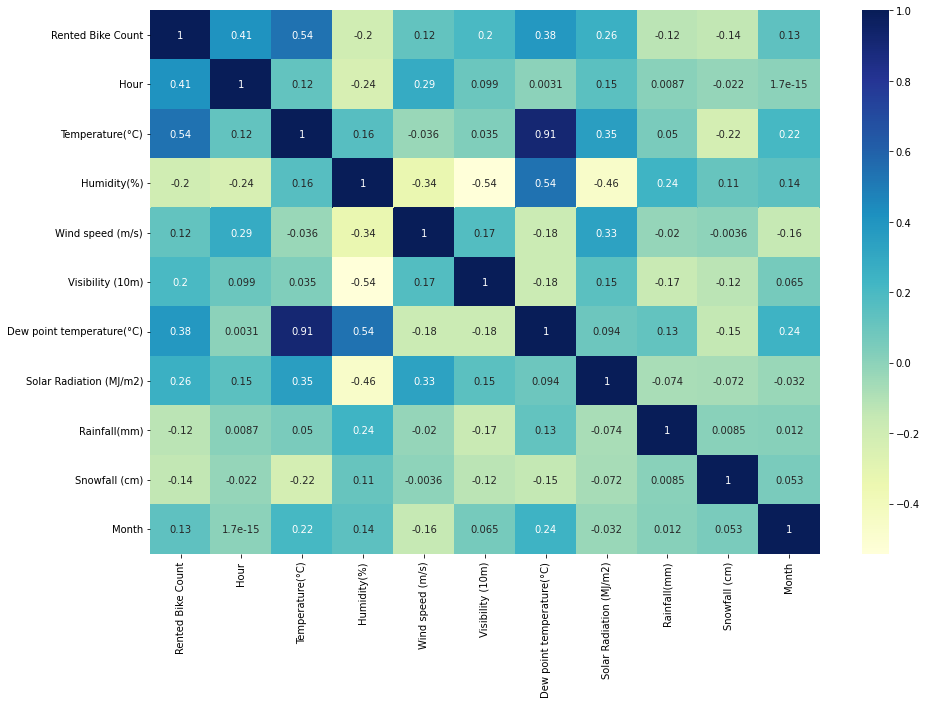

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Temperature(°C) and Dew point temperature(°C) have very strong relation so need to check the multicollinerity issue

In [ ]:
numeric_data= df._get_numeric_data() #drop non-numeric cols
numeric_data=numeric_data.iloc[:,:-1]
numeric_data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return(vif)

In [ ]:
data = numeric_data.iloc[:,1:]   # removing Rented Bike Count
calc_vif(data)

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


**we can easily understand there is multicollinerity issue is there in data set**

In [ ]:
# droping the dew point temp feature and cheking vif onece again
numeric_data=numeric_data.drop(['Dew point temperature(°C)'], axis=1)

In [ ]:
data = numeric_data.iloc[:,1:]   # removing Rented Bike Count
calc_vif(data)

,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


## For catogerical variable

In [ ]:
#Extracting categorical features
categorical_features= df.iloc[:,-5:-2]
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [ ]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [ ]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [ ]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([numeric_data,dummy_categorical_feature],axis=1)
final_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,1,1


above dataset is using for model prediction.

# Converting Dataset into Dependent variable and independent variable

In [ ]:
X=final_df.drop(['Rented Bike Count'],axis=1)
y=final_df['Rented Bike Count']

In [ ]:
#spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature Engineering
# most important feature during the model bulding (Information gain-mutual information for regression)
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.34552788, 0.37777882, 0.09977269, 0.02680064, 0.04653385,
       0.18012509, 0.06996973, 0.04029981, 0.01018326, 0.06742292,
       0.202306  , 0.00717604, 0.12526917])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = [X_train.columns]
mutual_info.sort_values(ascending=False)

Temperature(°C)            0.377779
Hour                       0.345528
Seasons_Winter             0.202306
Solar Radiation (MJ/m2)    0.180125
Functioning Day_Yes        0.125269
Humidity(%)                0.099773
Rainfall(mm)               0.069970
Seasons_Summer             0.067423
Visibility (10m)           0.046534
Snowfall (cm)              0.040300
Wind speed (m/s)           0.026801
Seasons_Spring             0.010183
Holiday_No Holiday         0.007176
dtype: float64

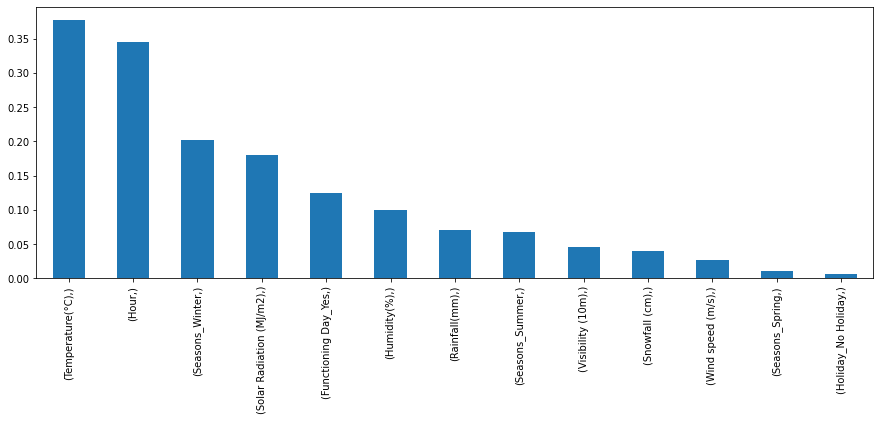

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
# standardization of data using standardscaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# MLR Model

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression()
fit_model=linear_model.fit(X_train, y_train)
predict_train=fit_model.predict(X_train)
predict_test=fit_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
test_set_rmse = (np.sqrt(mean_squared_error(predict_test,y_test )))
train_set_rmse = (np.sqrt(mean_squared_error(predict_train,y_train )))

print("RMSE_value_test :" , test_set_rmse)
print("RMSE_value_train :" , train_set_rmse)

RMSE_value_test : 436.54394979209957
RMSE_value_train : 431.7517527737028


In [ ]:
# Finding r2 values
train_set_r2 = r2_score(y_train, predict_train)
test_set_r2 = r2_score(y_test, predict_test)
print("r2_score_train :", train_set_r2)
print("r2_score_test :", test_set_r2)

r2_score_train : 0.5510831807965073
r2_score_test : 0.5446586985809233


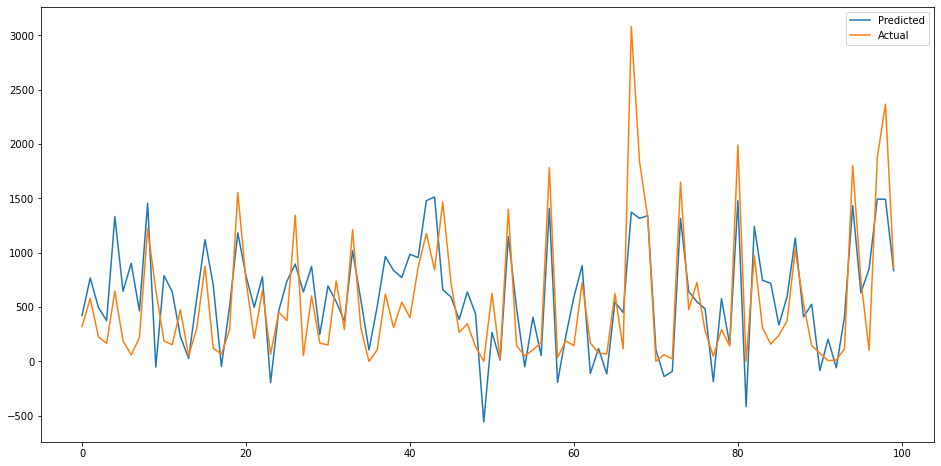

In [ ]:
# ploting actual and predicted
plt.figure(figsize=(16,8))
plt.plot((predict_test)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

# Using Ridge Regression 

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,50,100]}
ridge_grid_method = GridSearchCV(ridge, parameters, cv=5)
fit_model=ridge_grid_method.fit(X_train, y_train)
predict_train_R=fit_model.predict(X_train)
predict_test_R=fit_model.predict(X_test)

In [ ]:
test_set_rmse_ridge = (np.sqrt(mean_squared_error(predict_test_R,y_test )))
train_set_rmse = (np.sqrt(mean_squared_error(predict_train_R,y_train )))

print("RMSE_value_test_ridge :" , test_set_rmse)
print("RMSE_value_train :" , train_set_rmse)

RMSE_value_test_ridge : 436.54394979209957
RMSE_value_train : 431.75327725590097


In [ ]:
# Finding r2 values
train_set_r2 = r2_score(y_train, predict_train_R)
test_set_r2_ridge = r2_score(y_test, predict_test_R)
print("r2_score_train :", train_set_r2)
print("r2_score_test :", test_set_r2_ridge)

r2_score_train : 0.551080010609458
r2_score_test : 0.5445714078913444


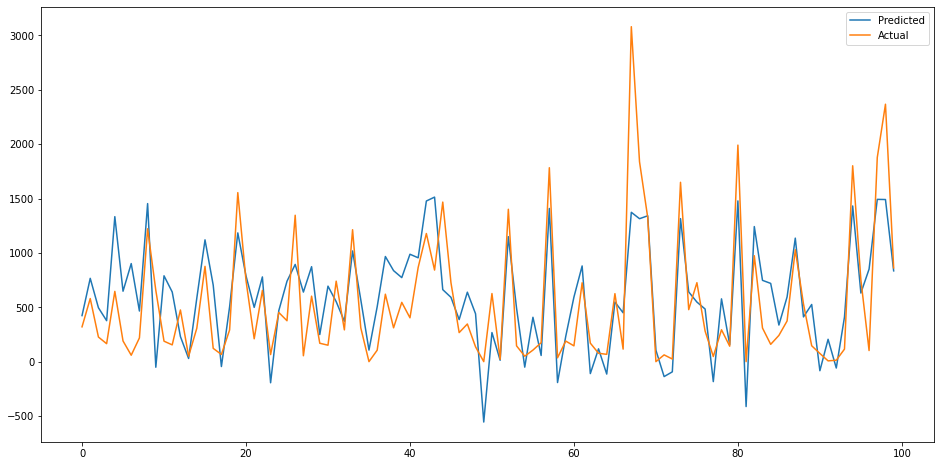

In [ ]:
# ploting actual and predicted
plt.figure(figsize=(16,8))
plt.plot((predict_test_R)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
fit_model=model_dt .fit(X_train, y_train)
predict_train_dt=fit_model.predict(X_train)
predict_test_dt=fit_model.predict(X_test)

In [ ]:
test_set_rmse_dt = (np.sqrt(mean_squared_error(predict_test_dt,y_test )))
train_set_rmse = (np.sqrt(mean_squared_error(predict_train_dt,y_train )))

print("RMSE_value_test :" , test_set_rmse_dt)
print("RMSE_value_train :" , train_set_rmse)

RMSE_value_test : 322.0379623598951
RMSE_value_train : 0.0


In [ ]:
# Finding r2 values
train_set_r2 = r2_score(y_train, predict_train_dt)
test_set_r2_dt = r2_score(y_test, predict_test_dt)
print("r2_score_train :", train_set_r2)
print("r2_score_test :", test_set_r2_dt)

r2_score_train : 1.0
r2_score_test : 0.7522034603104257


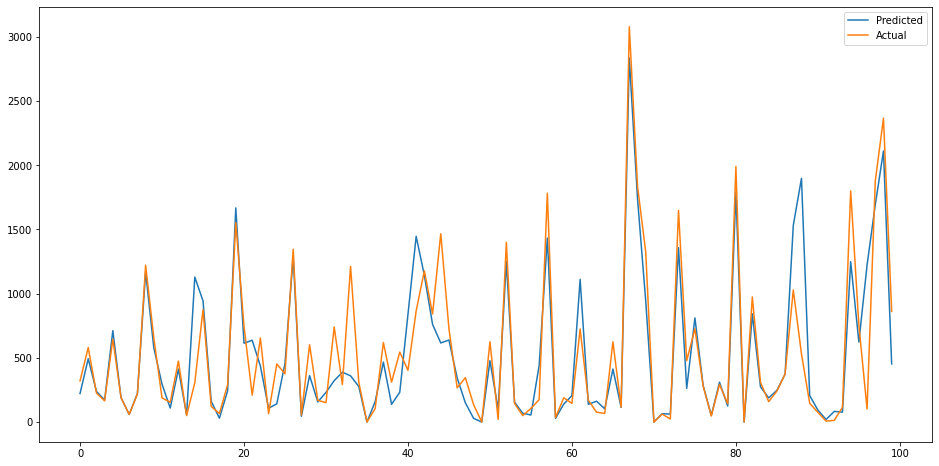

In [ ]:
# ploting actual and predicted
plt.figure(figsize=(16,8))
plt.plot((predict_test_dt)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
param_dict={'n_neighbors':[2,5,7,10,12,15,18,21,25,50]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)
fit_model=knn_grid .fit(X_train, y_train)
predict_train_knn=fit_model.predict(X_train)
predict_test_knn=fit_model.predict(X_test)

In [ ]:
test_set_rmse_knn = (np.sqrt(mean_squared_error(predict_test_knn,y_test )))
train_set_rmse = (np.sqrt(mean_squared_error(predict_train_knn,y_train )))

print("RMSE_value_test :" , test_set_rmse_knn)
print("RMSE_value_train :" , train_set_rmse)

RMSE_value_test : 301.0476533145709
RMSE_value_train : 237.2294308100615


In [ ]:
# Finding r2 values
train_set_r2 = r2_score(y_train, predict_train_knn)
test_set_r2_knn = r2_score(y_test, predict_test_knn)
print("r2_score_train :", train_set_r2)
print("r2_score_test :", test_set_r2_knn)

r2_score_train : 0.8644702016775065
r2_score_test : 0.7834532900579771


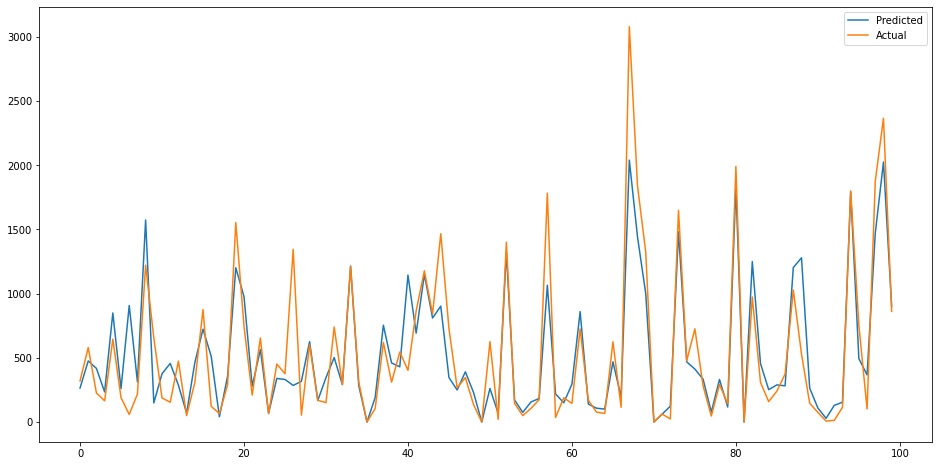

In [ ]:
# ploting actual and predicted
plt.figure(figsize=(16,8))
plt.plot((predict_test_knn)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

# XGBOOST model

In [ ]:
from xgboost import XGBRegressor
XGBOOST_model=XGBRegressor()

In [ ]:
#creating param dict for gridsearch
n_estimators=[50,75,100,150]
max_depth=[10,20,30,40,50]
params = {'n_estimators':n_estimators,'max_depth':max_depth }
xgb_grid= GridSearchCV(XGBOOST_model,param_grid=params,verbose=0)
fit_model=xgb_grid.fit(X_train, y_train)
predict_train_xgb=fit_model.predict(X_train)
predict_test_xgb=fit_model.predict(X_test)

[07:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
# best results used by model from gridsearch
fit_model.best_params_ , fit_model.best_score_ 

({'max_depth': 10, 'n_estimators': 75}, 0.8715998354129187)

In [ ]:
# Finding r2 values
train_set_r2 = r2_score(y_train, predict_train_xgb)
test_set_r2_xgb = r2_score(y_test, predict_test_xgb)
print("r2_score_train :", train_set_r2)
print("r2_score_test :", test_set_r2_xgb)

r2_score_train : 0.9867757493811257
r2_score_test : 0.8746444777342925


In [ ]:
test_set_rmse_xgb = (np.sqrt(mean_squared_error(predict_test_xgb,y_test )))
train_set_rmse = (np.sqrt(mean_squared_error(predict_train_xgb,y_train )))

print("RMSE_value_test :" , test_set_rmse_xgb)
print("RMSE_value_train :" , train_set_rmse)

RMSE_value_test : 229.05046966922285
RMSE_value_train : 74.10315629385416


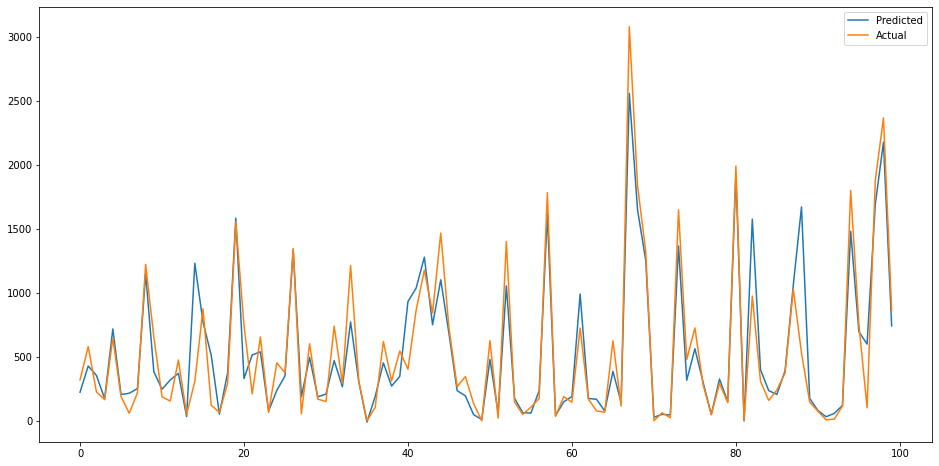

In [ ]:
# ploting actual and predicted
plt.figure(figsize=(16,8))
plt.plot((predict_test_xgb)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

## Compairing all the models

In [ ]:
models= ['LR_model','Ridge_model','Decision_Tree_model','KNN_model','xgb_model']
RMSE_value= [test_set_rmse,test_set_rmse_ridge,test_set_rmse_dt,test_set_rmse_knn,test_set_rmse_xgb]
R2_value= [test_set_r2,test_set_r2_ridge,test_set_r2_dt,test_set_r2_knn,test_set_r2_xgb]

In [ ]:
compaire_models = pd.DataFrame([RMSE_value,R2_value],columns=models)
compaire_models

,LR_model,Ridge_model,Decision_Tree_model,KNN_model,xgb_model
0,436.543950,436.585791,322.037962,301.047653,229.050470
1,0.544659,0.544571,0.752203,0.783453,0.874644


compaisring the all models r2 value and RMSE value XGBOOST model is far better model accuracy, so final model for prediction of bike count we can use XGBOOST.

In [ ]:
XGBOOST_model=XGBRegressor(n_estimators=75,max_depth=100,verbose=0)
fit_model_xgb=XGBOOST_model.fit(X_train, y_train)
predict_test_xgb=fit_model_xgb.predict(X_test)
test_set_r2_xgb = r2_score(y_test, predict_test_xgb)
print("r2_score_test :", test_set_r2_xgb)

[07:53:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score_test : 0.8604746492592469


## Model Expainability

In [ ]:
pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(fit_model_xgb)

In [ ]:
shap_values = explainer(X_train,check_additivity=False)

In blue, we have negative Shap values that show everything that pushes the bike count value in the negative direction. While the Shap value in red represents everything that pushes it towards a positive direction. imp its only for one observation.

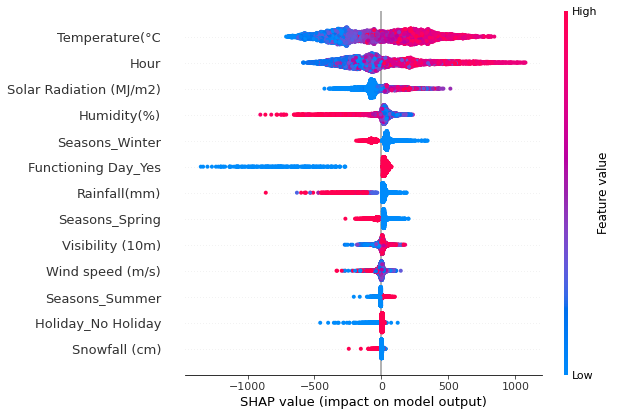

In [ ]:
shap.summary_plot(shap_values, features=X_train, feature_names=['Hour','Temperature(°C','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons_Spring','Seasons_Summer','Seasons_Winter','Holiday_No Holiday','Functioning Day_Yes'])

Shap values on the x-axis. Here, all the values on the left represent the observations that shift the predicted value in the negative direction while the points on the right contribute to shifting the prediction in a positive direction. All the features are on the left y-axis.